# Capstone 3 EDA
---

## Table of Contents
---
1. [Data Summary](#first-bullet)
    1. [Summary Statistics](#second-bullet)
    2. [Summary Stats by Channel](#third-bullet)
2. [Engagement Stats by Channel ](#fourth-bullet)
    1. [Engagement Rates](#fifth-bullet)
3. [Text Analysis (Tokens)](#sixth-bullet)
    1. [Word Counts](#seventh-bullet)
    2. [TFIDF Weights](#eigth-bullet)
    3. [Popular Comments](#ninth-bullet)
4. [Text Analysis (n-grams)](#tenth-bullet)
    1. [Bigrams](#eleventh-bullet)
    2. [Trigrams](#twelfth-bullet)

## 1. Data Summary <a class="anchor" id="first-bullet"></a>
***

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
youtube_comments = pd.read_csv('Cap3_DataWrangling.csv')

### A. Summary Statistics <a class="anchor" id="second-bullet"></a>

In [36]:
youtube_comments.shape

(14329, 8)

In [37]:
youtube_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14329 entries, 0 to 14328
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   video_id             14329 non-null  object 
 1   comment_text         14329 non-null  object 
 2   comment_likes        14329 non-null  float64
 3   video_title          14329 non-null  object 
 4   channel_title        14329 non-null  object 
 5   video_views          14329 non-null  int64  
 6   video_likes          14329 non-null  int64  
 7   video_comment_count  14329 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 895.7+ KB


In [38]:
youtube_comments.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,comment_likes,video_views,video_likes,video_comment_count
count,14329.00,14329.00,14329.00,14329.00
mean,59.19,379225.38,5903.83,4296.36
std,293.65,535900.76,8825.21,5685.72
min,0.00,8923.00,153.00,192.00
25%,0.00,65428.00,915.00,900.00
50%,3.00,172970.00,2250.00,2344.00
75%,23.00,528265.00,6378.00,5495.00
max,12093.00,3527470.00,51100.00,40155.00


In [39]:
youtube_comments.sample(5, random_state =343)

,video_id,comment_text,comment_likes,video_title,channel_title,video_views,video_likes,video_comment_count
10745,ja48GqBAWH8,I'm so happy Jerry is doing well!!,26.0,Hear doctor&#39;s grim prognosis for unvaccina...,CNN,304768,5403,3806
8607,oGmkepc6ITc,Lies,0.0,Covid Has Killed More Americans Than The 1918 ...,MSNBC,52041,685,916
6118,ro3RY8PcJU4,"Pi, Rho, Sigma variants will be interesting",0.0,U.S. Sets Fresh Record For Daily Covid Cases,MSNBC,16073,281,320
9125,lH4GyWzBNGw,He needs to be charged by the DOJ for any just...,557.0,Explosive Report: Trump Admin &#39;Criminally ...,MSNBC,699554,14399,5495
2456,YnSPqHK5POY,Because Midterms.... Well said Trey.,19.0,Trey Gowdy: COVID politics have trumped science,Fox News,128528,4106,834


In [40]:
video_channels = youtube_comments['channel_title'].unique()
print('There are {} youtube channels included in this dataset.'.format(len(video_channels)))
print('The channels are {}, {}, and {}.'.format(*video_channels))


video_count = len(youtube_comments['video_id'].unique())
comment_count = len(youtube_comments)
print ('The dataset contains {} comments ' 
       'from {} videos regarding Covid-19'.format(comment_count,video_count))

There are 3 youtube channels included in this dataset.
The channels are Fox News, MSNBC, and CNN.
The dataset contains 14329 comments from 147 videos regarding Covid-19


### B. Summary Stats by Channel  <a class="anchor" id="third-bullet"></a>

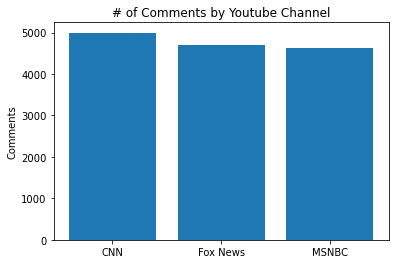

CNN         4998
Fox News    4699
MSNBC       4632
Name: channel_title, dtype: int64


In [41]:
comment_dist = youtube_comments['channel_title'].value_counts()

plt.bar(comment_dist.index, comment_dist)
plt.ylabel('Comments')
plt.title('# of Comments by Youtube Channel')
plt.show()

print(comment_dist)

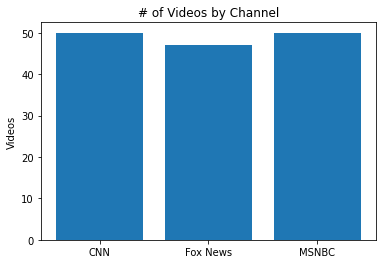

    Channel  Video Count
0       CNN           50
1  Fox News           47
2     MSNBC           50


In [42]:
videos_grouped = youtube_comments.groupby('channel_title')['video_id'].unique()


video_dist = [[videos_grouped.index[x], len(videos_grouped[x])] 
              for x in np.arange(len(videos_grouped))]
video_dist = pd.DataFrame(video_dist, columns=['Channel','Video Count'])

plt.bar(video_dist['Channel'],video_dist['Video Count'])
plt.ylabel('Videos')
plt.title('# of Videos by Channel')
plt.show()

print(video_dist)

We can see that three news networks are almost equally represent in number of videos and number of comments

## 2. Engagement Stats by Channel  <a class="anchor" id="fourth-bullet"></a>
---

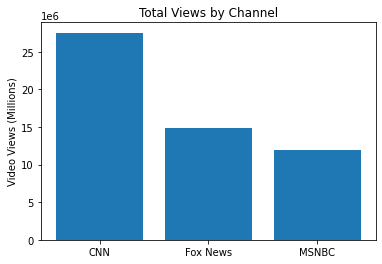

channel_title
CNN         27551239
Fox News    14940248
MSNBC       11979158
Name: video_views, dtype: int64

In [43]:
video_views = youtube_comments.\
    drop_duplicates(subset = 'video_id').\
    groupby('channel_title')['video_views'].sum()

plt.bar(video_views.index, video_views)
plt.ylabel('Video Views (Millions)')
plt.ticklabel_format(axis ='y', scilimits = (6,6))
plt.title('Total Views by Channel')
plt.show()

video_views

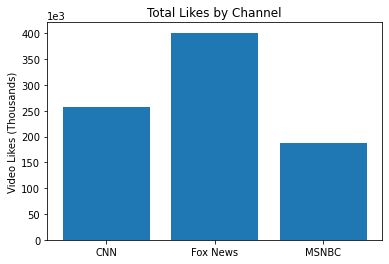

channel_title
CNN         258341
Fox News    401424
MSNBC       188039
Name: video_likes, dtype: int64

In [44]:
video_likes = youtube_comments.drop_duplicates(subset = 'video_id').\
    groupby('channel_title')['video_likes'].sum()

plt.bar(video_likes.index, video_likes)
plt.ticklabel_format(axis ='y', scilimits = (3,3))
plt.ylabel('Video Likes (Thousands)')
plt.title('Total Likes by Channel')
plt.show()

video_likes

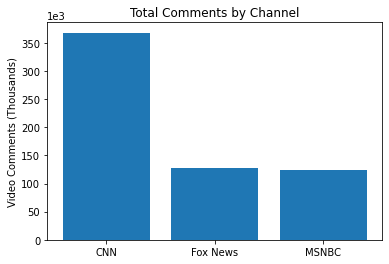

channel_title
CNN         367835
Fox News    126736
MSNBC       123113
Name: video_comment_count, dtype: int64

In [45]:
video_comment_count = youtube_comments.drop_duplicates(subset = 'video_id').\
    groupby('channel_title')['video_comment_count'].sum()

plt.bar(video_comment_count.index, video_comment_count)
plt.ticklabel_format(axis ='y', scilimits = (3,3))
plt.ylabel('Video Comments (Thousands)')
plt.title('Total Comments by Channel')
plt.show()

video_comment_count

API limits to max 15000 comments with 3 channels.  Only a small sample of the total comments is taken for the sample video comments.  We can see that CNN draws the most views and comments in this sample of videos.  Fox videos have the most likes in this sample of videos. 

### A. Engagement Rates <a class="anchor" id="fifth-bullet"></a>

In [46]:
video_like_rate = video_likes/video_views
video_like_rate

channel_title
CNN         0.009377
Fox News    0.026869
MSNBC       0.015697
dtype: float64

In [47]:
video_comment_count/video_views

channel_title
CNN         0.013351
Fox News    0.008483
MSNBC       0.010277
dtype: float64

We can see that Fox news has the highest percentage of views which lead to likes.  And CNN has the highest percentage of views which lead to comments.

## 3. Text Analysis (Tokens) <a class="anchor" id="sixth-bullet"></a>
---

In [48]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel

from collections import Counter
from wordcloud import WordCloud

from matplotlib.colors import ListedColormap

In [49]:
lower_yt_comments = [comment.lower() for comment in youtube_comments['comment_text']]

token_yt_comments = [word_tokenize(comment) for comment in lower_yt_comments] 

alpha_only_yt_tokens =  [[token for token in comment if token.isalpha() and len(token)>1] for comment in token_yt_comments] 

no_stop_tokens = [[token for token in comment if token not in stopwords.words('english')] for comment in alpha_only_yt_tokens]

youtube_comments['comments_tokens'] = no_stop_tokens
youtube_comments['comments_tokens_size'] = [len(x) for x in youtube_comments['comments_tokens']]

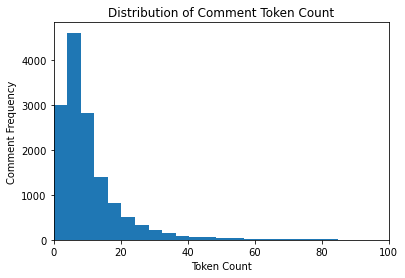

count    14329.000000
mean        11.649173
std         15.515638
min          0.000000
25%          5.000000
50%          8.000000
75%         13.000000
max        405.000000
Name: comments_tokens_size, dtype: float64


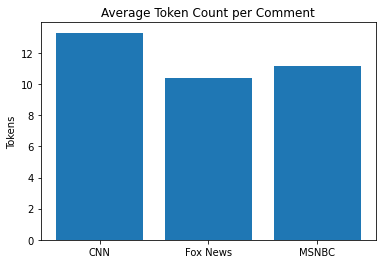

channel_title
CNN         13.297719
Fox News    10.409236
MSNBC       11.128238
Name: comments_tokens_size, dtype: float64


In [50]:
plt.hist(youtube_comments['comments_tokens_size'],bins =100)
plt.xlim(xmin=0, xmax = 100)
plt.xlabel('Token Count')
plt.ylabel('Comment Frequency')
plt.title('Distribution of Comment Token Count')
plt.show()

print(youtube_comments['comments_tokens_size'].describe())


avg_token_count = youtube_comments.groupby('channel_title')['comments_tokens_size'].mean()
plt.bar(avg_token_count.index, avg_token_count)
plt.title('Average Token Count per Comment')
plt.ylabel('Tokens')
plt.show()

print(avg_token_count)


The mean token count for all the comments in this sample is 11.69 tokens.  When stratified by news network, CNN's mean token count is above the total mean token count, while Fox and MSNBC are below the mean.

#### A. Word Counts <a class="anchor" id="seventh-bullet"></a>

In [51]:
def create_wordcloud(dictionary, title, scheme):
    
    cnn_cmap = ['red','white']
    fox_cmap = ['red','white','blue']
    msnbc_cmap = ['gold','orange','red','slateblue','cornflowerblue','lime']
    
    col = {'cnn': cnn_cmap, 'fox': fox_cmap, 'msnbc': msnbc_cmap}
    
    wordcloud = WordCloud(max_font_size=60,
                          max_words=50,
                          background_color="black",
                          scale = 10, 
                          colormap = ListedColormap(col.get(scheme)))
    
    wordcloud_im = wordcloud.generate_from_frequencies(dictionary)
    
    plt.figure(figsize=(12,12))
    plt.imshow(wordcloud_im, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize =20, y = 1.02, style = 'oblique')
    plt.show()
    
    
    

In [52]:
fox_mask = youtube_comments['channel_title']=='Fox News'
cnn_mask = youtube_comments['channel_title']=='CNN'
msnbc_mask = youtube_comments['channel_title']=='MSNBC'

CNN_tokens = youtube_comments[cnn_mask]['comments_tokens'].sum()
MSNBC_tokens = youtube_comments[msnbc_mask]['comments_tokens'].sum()
FOX_tokens = youtube_comments[fox_mask]['comments_tokens'].sum()

cnn_token_counts = Counter(CNN_tokens)
fox_token_counts = Counter(FOX_tokens)
msnbc_token_counts = Counter(MSNBC_tokens)

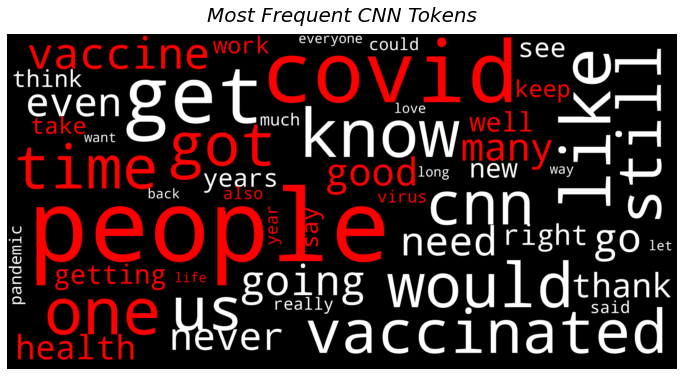

In [53]:
create_wordcloud(cnn_token_counts,'Most Frequent CNN Tokens','cnn')

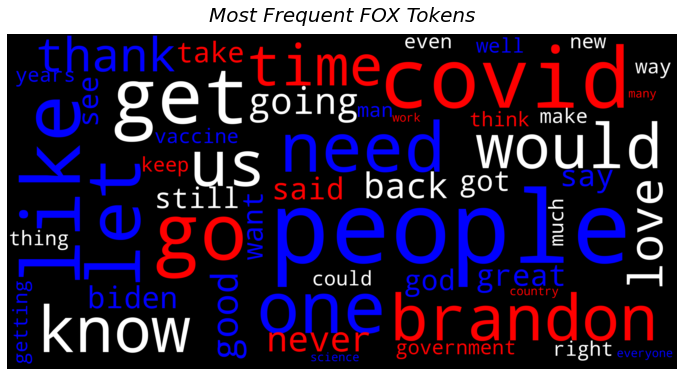

In [54]:
create_wordcloud(fox_token_counts, 'Most Frequent FOX Tokens','fox')


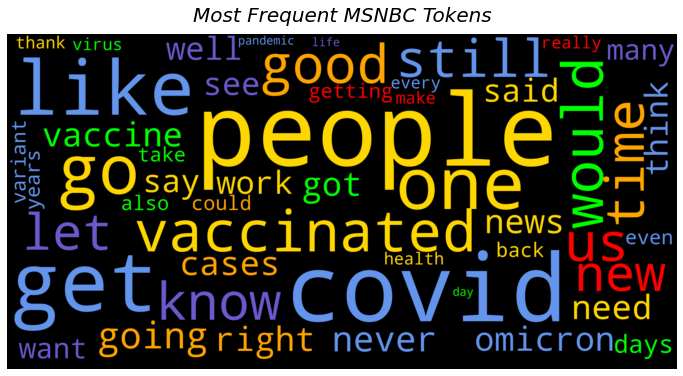

In [55]:
create_wordcloud(msnbc_token_counts, 'Most Frequent MSNBC Tokens', 'msnbc')

#### B. TFIDF <a class="anchor" id="eigth-bullet"></a>

In [56]:
fox_mask = youtube_comments['channel_title']=='Fox News'
cnn_mask = youtube_comments['channel_title']=='CNN'
msnbc_mask = youtube_comments['channel_title']=='MSNBC'

CNN_tokens = youtube_comments[cnn_mask]['comments_tokens'].sum()
MSNBC_tokens = youtube_comments[msnbc_mask]['comments_tokens'].sum()
FOX_tokens = youtube_comments[fox_mask]['comments_tokens'].sum()

In [57]:
all_tokens = [CNN_tokens, FOX_tokens, MSNBC_tokens]

dictionary = Dictionary(all_tokens)

corpus = [dictionary.doc2bow(channel) for channel in all_tokens]

tfidf = TfidfModel(corpus)

cnn_tfidf_weights = tfidf[corpus[0]]
fox_tfidf_weights = tfidf[corpus[1]]
msnbc_tfidf_weights = tfidf[corpus[2]]

cnn_tfidf_wt_words =  {dictionary.get(term_id): weight for term_id, weight in cnn_tfidf_weights}


fox_tfidf_wt_words = {dictionary.get(term_id): weight for term_id, weight in fox_tfidf_weights}


msnbc_tfidf_wt_words = {dictionary.get(term_id): weight for term_id, weight in msnbc_tfidf_weights}
 


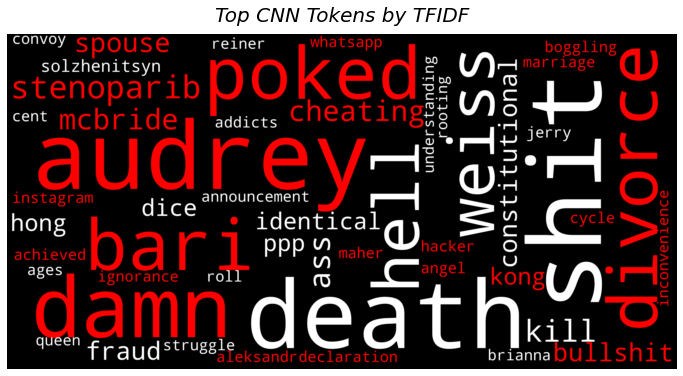

In [58]:
create_wordcloud(cnn_tfidf_wt_words, 'Top CNN Tokens by TFIDF','cnn')

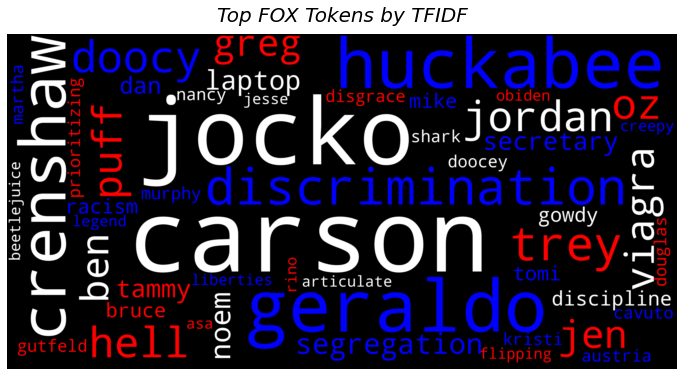

In [59]:
create_wordcloud(fox_tfidf_wt_words, 'Top FOX Tokens by TFIDF','fox' )

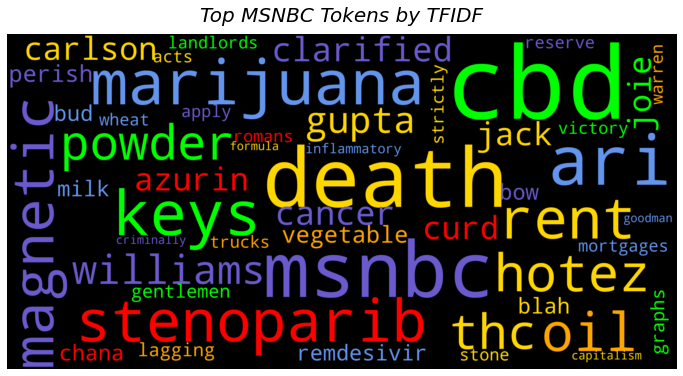

In [60]:
create_wordcloud(msnbc_tfidf_wt_words, 'Top MSNBC Tokens by TFIDF','msnbc')

#### C. Popular Comments <a class="anchor" id="ninth-bullet"></a>

##### i. Counts

In [61]:
cnn_mask = youtube_comments['channel_title']=='CNN'
fox_mask = youtube_comments['channel_title']=='Fox News'
msnbc_mask = youtube_comments['channel_title']=='MSNBC'

cnn_most_liked = youtube_comments[cnn_mask].nlargest(100, 'comment_likes')
fox_most_liked = youtube_comments[fox_mask].nlargest(100, 'comment_likes')
msnbc_most_liked = youtube_comments[msnbc_mask].nlargest(100, 'comment_likes')

liked_cnn_tokens =  cnn_most_liked['comments_tokens'].sum()
liked_fox_tokens =  fox_most_liked['comments_tokens'].sum()
liked_msnbc_tokens = msnbc_most_liked['comments_tokens'].sum()

liked_cnn_token_counts = Counter(liked_cnn_tokens)
liked_fox_token_counts = Counter(liked_fox_tokens)
liked_msnbc_token_counts = Counter(liked_msnbc_tokens)

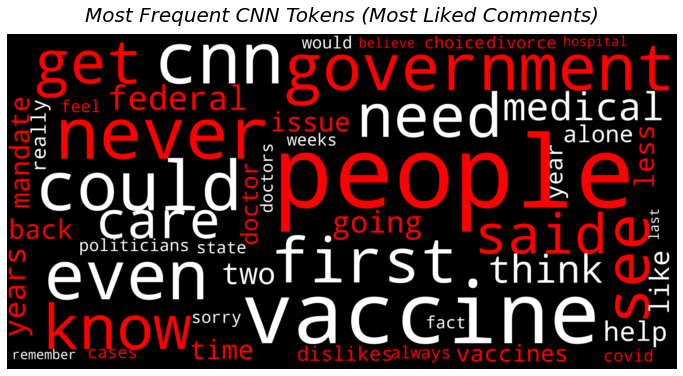

In [62]:
create_wordcloud(liked_cnn_token_counts,'Most Frequent CNN Tokens (Most Liked Comments)','cnn')

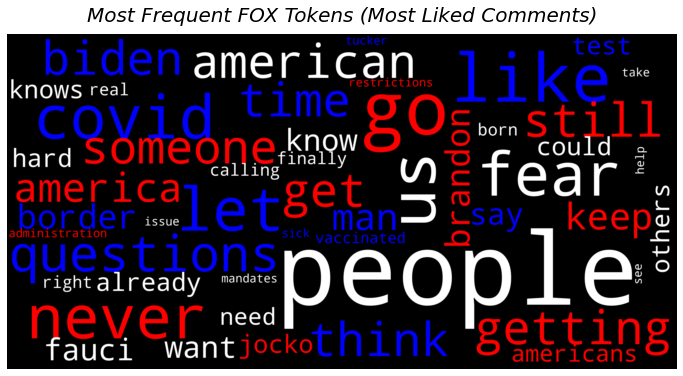

In [63]:
create_wordcloud(liked_fox_token_counts,'Most Frequent FOX Tokens (Most Liked Comments)','fox')

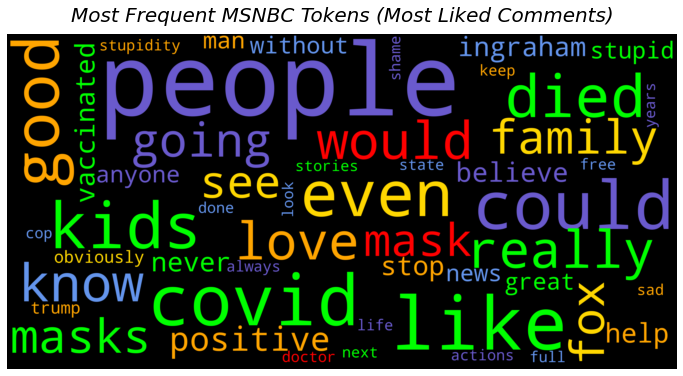

In [64]:
create_wordcloud(liked_msnbc_token_counts,'Most Frequent MSNBC Tokens (Most Liked Comments)', 'msnbc')

##### ii. TFIDF

In [65]:
all_tokens = [liked_cnn_tokens,
              liked_fox_tokens,
              liked_msnbc_tokens]

dictionary = Dictionary(all_tokens)

corpus = [dictionary.doc2bow(channel) for channel in all_tokens]

tfidf = TfidfModel(corpus)

cnn_tfidf_weights = tfidf[corpus[0]]
fox_tfidf_weights = tfidf[corpus[1]]
msnbc_tfidf_weights = tfidf[corpus[2]]

cnn_tfidf_wt_words =  {dictionary.get(term_id): weight for term_id, weight in cnn_tfidf_weights}

fox_tfidf_wt_words = {dictionary.get(term_id): weight for term_id, weight in fox_tfidf_weights}

msnbc_tfidf_wt_words = {dictionary.get(term_id): weight for term_id, weight in msnbc_tfidf_weights}
 

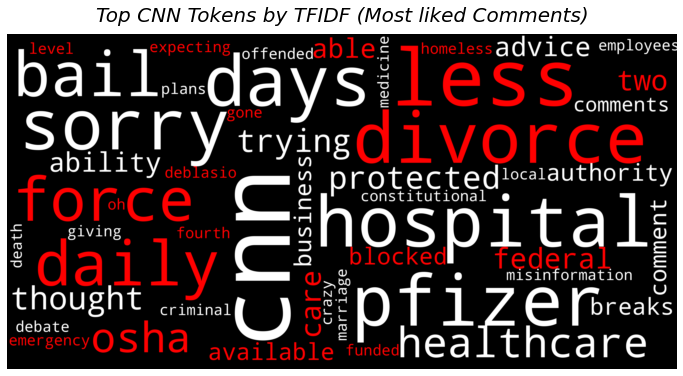

In [66]:
create_wordcloud(cnn_tfidf_wt_words,'Top CNN Tokens by TFIDF (Most liked Comments)','cnn')

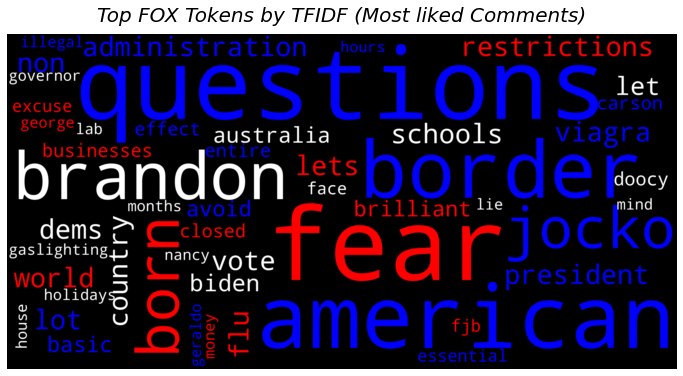

In [67]:
create_wordcloud(fox_tfidf_wt_words,'Top FOX Tokens by TFIDF (Most liked Comments)','fox')

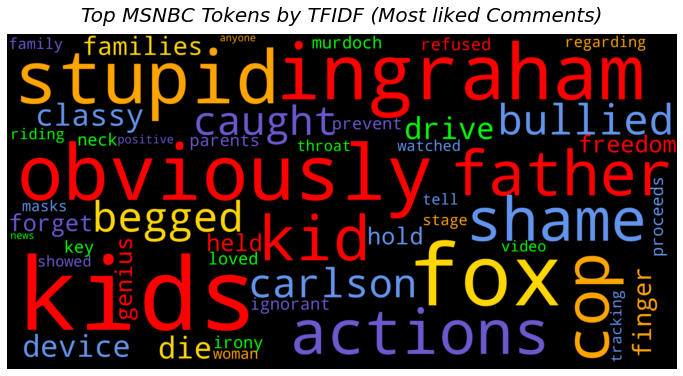

In [68]:
create_wordcloud(msnbc_tfidf_wt_words,'Top MSNBC Tokens by TFIDF (Most liked Comments)','msnbc')

## 4. Text Analysis (n-grams) <a class="anchor" id="tenth-bullet"></a>
---

In [69]:
import nltk
from nltk.util import bigrams
from nltk.util import trigrams


In [70]:
lower_yt_comments = [comment.lower() for comment in youtube_comments['comment_text']]

token_yt_comments = [word_tokenize(comment) for comment in lower_yt_comments] 

alpha_only_yt_tokens =  [[token for token in comment if token.isalpha() and len(token)>1] for comment in token_yt_comments]

no_stop_tokens = [[token for token in comment if token not in stopwords.words('english')] for comment in alpha_only_yt_tokens]


### A. Bigrams <a class="anchor" id="eleventh-bullet"></a>

In [71]:
bigram_var = [bigrams(comment) for comment in no_stop_tokens]
bigram_list = [list(bigram) for bigram in bigram_var]
bigram_tokens = [[' '.join(tupl) for tupl in b_list] for b_list in bigram_list]

youtube_comments['bigrams'] = bigram_tokens

In [72]:
fox_mask = youtube_comments['channel_title']=='Fox News'
cnn_mask = youtube_comments['channel_title']=='CNN'
msnbc_mask = youtube_comments['channel_title']=='MSNBC'

CNN_bi_tokens = youtube_comments[cnn_mask]['bigrams'].sum()
FOX_bi_tokens = youtube_comments[fox_mask]['bigrams'].sum()
MSNBC_bi_tokens = youtube_comments[msnbc_mask]['bigrams'].sum()

CNN_bi_counts  = Counter(CNN_bi_tokens) 
FOX_bi_counts = Counter(FOX_bi_tokens)
MSNBC_bi_counts = Counter(MSNBC_bi_tokens)

In [73]:
CNN_bi_counts.most_common(20)

[('god bless', 56),
 ('fully vaccinated', 54),
 ('many people', 53),
 ('let go', 53),
 ('go brandon', 48),
 ('gon na', 40),
 ('get vaccinated', 39),
 ('got covid', 39),
 ('natural immunity', 35),
 ('two years', 32),
 ('wear mask', 31),
 ('mental health', 30),
 ('thank god', 29),
 ('health care', 28),
 ('even though', 27),
 ('healthcare workers', 27),
 ('long term', 26),
 ('new york', 26),
 ('know know', 25),
 ('know lying', 24)]

In [74]:
FOX_bi_counts.most_common(20)

[('go brandon', 166),
 ('let go', 163),
 ('god bless', 78),
 ('gon na', 36),
 ('fox news', 29),
 ('southern border', 27),
 ('peter doocy', 26),
 ('thank god', 25),
 ('got covid', 22),
 ('side effects', 21),
 ('people need', 21),
 ('natural immunity', 20),
 ('federal solution', 20),
 ('joe biden', 20),
 ('white house', 19),
 ('lets go', 19),
 ('american people', 18),
 ('ben carson', 18),
 ('new york', 17),
 ('years ago', 17)]

In [75]:
MSNBC_bi_counts.most_common(20)

[('let go', 67),
 ('go brandon', 59),
 ('get vaccinated', 39),
 ('gon na', 37),
 ('fully vaccinated', 32),
 ('wear mask', 27),
 ('public health', 24),
 ('health care', 23),
 ('south africa', 23),
 ('fox news', 22),
 ('got covid', 22),
 ('natural immunity', 21),
 ('go back', 21),
 ('looks like', 21),
 ('new variant', 20),
 ('many people', 20),
 ('two years', 19),
 ('anthony fauci', 19),
 ('good news', 19),
 ('wearing mask', 18)]

#### i. TFIDF

In [76]:
all_tokens = [CNN_bi_tokens,
              FOX_bi_tokens,
              MSNBC_bi_tokens]

dictionary = Dictionary(all_tokens)

corpus = [dictionary.doc2bow(channel) for channel in all_tokens]

tfidf = TfidfModel(corpus)

cnn_tfidf_weights = tfidf[corpus[0]]
fox_tfidf_weights = tfidf[corpus[1]]
msnbc_tfidf_weights = tfidf[corpus[2]]

cnn_tfidf_wt_bi =  {dictionary.get(term_id): weight for term_id, weight in cnn_tfidf_weights}

fox_tfidf_wt_bi = {dictionary.get(term_id): weight for term_id, weight in fox_tfidf_weights}

msnbc_tfidf_wt_bi = {dictionary.get(term_id): weight for term_id, weight in msnbc_tfidf_weights}

In [77]:
Counter(cnn_tfidf_wt_bi).most_common(20)

[('lying know', 0.07067932899858004),
 ('bari weiss', 0.04573368346966943),
 ('community schools', 0.04157607588151767),
 ('sorry loss', 0.04157607588151767),
 ('know know', 0.03836123142780878),
 ('thank chris', 0.037418468293365904),
 ('watch cnn', 0.037418468293365904),
 ('chris cuomo', 0.03326086070521413),
 ('chris thank', 0.03326086070521413),
 ('media training', 0.03326086070521413),
 ('prior infection', 0.03326086070521413),
 ('wait see', 0.03326086070521413),
 ('doses doses', 0.02910325311706237),
 ('eric trump', 0.02910325311706237),
 ('hard way', 0.02910325311706237),
 ('hong kong', 0.02910325311706237),
 ('case rate', 0.024945645528910602),
 ('cdc yes', 0.024945645528910602),
 ('comes along', 0.024945645528910602),
 ('important question', 0.024945645528910602)]

In [78]:
Counter(fox_tfidf_wt_bi).most_common(20)

[('ben carson', 0.0887200120593771),
 ('dr oz', 0.07393334338281425),
 ('thank tucker', 0.05914667470625141),
 ('dr carson', 0.05421778514739712),
 ('hard evidence', 0.04928889558854284),
 ('mike huckabee', 0.04928889558854284),
 ('peter doocy', 0.047296768586740943),
 ('jim jordan', 0.04436000602968855),
 ('monoclonal antibodies', 0.04436000602968855),
 ('already knows', 0.03943111647083427),
 ('evidence needed', 0.03943111647083427),
 ('know came', 0.03943111647083427),
 ('need additional', 0.03943111647083427),
 ('press secretary', 0.03943111647083427),
 ('skin color', 0.03943111647083427),
 ('worst president', 0.03943111647083427),
 ('based race', 0.03450222691197999),
 ('brandon let', 0.03450222691197999),
 ('carson glad', 0.03450222691197999),
 ('constantly need', 0.03450222691197999)]

In [79]:
Counter(msnbc_tfidf_wt_bi).most_common(20)

[('blah blah', 0.05706452815024745),
 ('cbd oil', 0.052309150804393495),
 ('diet plan', 0.04755377345853954),
 ('brian williams', 0.042798396112685586),
 ('hahaha hahaha', 0.042798396112685586),
 ('plan strictly', 0.042798396112685586),
 ('say name', 0.042798396112685586),
 ('butter clarified', 0.03804301876683163),
 ('convince forward', 0.03804301876683163),
 ('get job', 0.03804301876683163),
 ('let convince', 0.03804301876683163),
 ('aunt joie', 0.033287641420977676),
 ('battle plan', 0.033287641420977676),
 ('days sobriety', 0.033287641420977676),
 ('floyd days', 0.033287641420977676),
 ('jack black', 0.033287641420977676),
 ('joie azurin', 0.033287641420977676),
 ('love say', 0.033287641420977676),
 ('name liberals', 0.033287641420977676),
 ('pneumonia inflammation', 0.033287641420977676)]

### B. Trigrams <a class="anchor" id="twelfth-bullet"></a>

In [80]:
trigram_var = [trigrams(comment) for comment in no_stop_tokens]
trigram_list = [list(trigram) for trigram in trigram_var]
trigram_tokens = [[' '.join(tupl) for tupl in t_list] for t_list in trigram_list]

youtube_comments['trigrams'] = trigram_tokens

In [81]:
fox_mask = youtube_comments['channel_title']=='Fox News'
cnn_mask = youtube_comments['channel_title']=='CNN'
msnbc_mask = youtube_comments['channel_title']=='MSNBC'

CNN_tri_tokens = youtube_comments[cnn_mask]['trigrams'].sum()
FOX_tri_tokens = youtube_comments[fox_mask]['trigrams'].sum()
MSNBC_tri_tokens = youtube_comments[msnbc_mask]['trigrams'].sum()

CNN_tri_counts  = Counter(CNN_tri_tokens) 
FOX_tri_counts = Counter(FOX_tri_tokens)
MSNBC_tri_counts = Counter(MSNBC_tri_tokens)

In [82]:
CNN_tri_counts.most_common(20)

[('let go brandon', 37),
 ('know lying know', 17),
 ('combination stenoparib remdesivir', 13),
 ('health care workers', 13),
 ('lying know know', 12),
 ('know know lying', 12),
 ('antiviral activity stenoparib', 11),
 ('activity stenoparib four', 11),
 ('weeks flatten curve', 10),
 ('lets go brandon', 10),
 ('long term effects', 10),
 ('know know know', 8),
 ('gain compliance absolutely', 8),
 ('compliance absolutely certain', 8),
 ('absolutely certain promoted', 8),
 ('certain promoted best', 8),
 ('leave kids alone', 8),
 ('new study published', 7),
 ('study published preprint', 7),
 ('published preprint server', 7)]

In [83]:
FOX_tri_counts.most_common(20)

[('let go brandon', 145),
 ('lets go brandon', 17),
 ('let others know', 10),
 ('hard evidence needed', 8),
 ('god bless america', 8),
 ('brandon let go', 7),
 ('go brandon agree', 7),
 ('constantly need additional', 7),
 ('need additional shots', 7),
 ('additional shots maintain', 7),
 ('shots maintain vaccination', 7),
 ('maintain vaccination addiction', 7),
 ('keep good work', 6),
 ('get back normal', 6),
 ('long time ago', 6),
 ('go brandon let', 6),
 ('god bless carson', 6),
 ('worst president ever', 5),
 ('leave us alone', 5),
 ('call lord day', 5)]

In [84]:
MSNBC_tri_counts.most_common(20)

[('let go brandon', 48),
 ('combination stenoparib remdesivir', 13),
 ('real anthony fauci', 11),
 ('antiviral activity stenoparib', 11),
 ('activity stenoparib four', 11),
 ('health care workers', 9),
 ('diet plan strictly', 9),
 ('weeks flatten curve', 8),
 ('go back work', 8),
 ('go brandon agree', 8),
 ('let convince forward', 8),
 ('blah blah blah', 8),
 ('lets go brandon', 8),
 ('researchers current study', 7),
 ('current study also', 7),
 ('study also evaluated', 7),
 ('also evaluated inhibitory', 7),
 ('evaluated inhibitory action', 7),
 ('inhibitory action combination', 7),
 ('action combination stenoparib', 7)]

#### i. TFIDF

In [85]:
all_tokens = [CNN_tri_tokens,
              FOX_tri_tokens,
              MSNBC_tri_tokens]

dictionary = Dictionary(all_tokens)

corpus = [dictionary.doc2bow(channel) for channel in all_tokens]

tfidf = TfidfModel(corpus)

cnn_tfidf_weights = tfidf[corpus[0]]
fox_tfidf_weights = tfidf[corpus[1]]
msnbc_tfidf_weights = tfidf[corpus[2]]

cnn_tfidf_wt_tri =  {dictionary.get(term_id): weight for term_id, weight in cnn_tfidf_weights}

fox_tfidf_wt_tri = {dictionary.get(term_id): weight for term_id, weight in fox_tfidf_weights}

msnbc_tfidf_wt_tri = {dictionary.get(term_id): weight for term_id, weight in msnbc_tfidf_weights}

In [86]:
Counter(cnn_tfidf_wt_tri).most_common(20)

[('know lying know', 0.07059728870843847),
 ('know know lying', 0.0498333802647801),
 ('lying know know', 0.0498333802647801),
 ('know lying still', 0.02491669013239005),
 ('thank healthcare workers', 0.02491669013239005),
 ('doses doses doses', 0.02076390844365837),
 ('expecting different results', 0.02076390844365837),
 ('lying know lying', 0.02076390844365837),
 ('lying still aleksandr', 0.02076390844365837),
 ('still aleksandr solzhenitsyn', 0.02076390844365837),
 ('combination stenoparib remdesivir', 0.019924686095913798),
 ('health care workers', 0.019924686095913798),
 ('activity stenoparib four', 0.01685934977346552),
 ('antiviral activity stenoparib', 0.01685934977346552),
 ('feel sorry people', 0.016611126754926698),
 ('heart goes medical', 0.016611126754926698),
 ('long term studies', 0.016611126754926698),
 ('major difference bank', 0.016611126754926698),
 ('make major difference', 0.016611126754926698),
 ('mask enter restaurant', 0.016611126754926698)]

In [87]:
Counter(fox_tfidf_wt_tri).most_common(20)

[('hard evidence needed', 0.039936829099837284),
 ('additional shots maintain', 0.03494472546235763),
 ('brandon let go', 0.03494472546235763),
 ('constantly need additional', 0.03494472546235763),
 ('maintain vaccination addiction', 0.03494472546235763),
 ('need additional shots', 0.03494472546235763),
 ('shots maintain vaccination', 0.03494472546235763),
 ('go brandon let', 0.029952621824877967),
 ('god bless carson', 0.029952621824877967),
 ('god bless dr', 0.024960518187398303),
 ('worst president ever', 0.024960518187398303),
 ('among persons aged', 0.019968414549918642),
 ('bless dr carson', 0.019968414549918642),
 ('brother get bowl', 0.019968414549918642),
 ('contact months large', 0.019968414549918642),
 ('dr ben carson', 0.019968414549918642),
 ('fears people liberty', 0.019968414549918642),
 ('getting ready try', 0.019968414549918642),
 ('government fears people', 0.019968414549918642),
 ('know contact months', 0.019968414549918642)]

In [88]:
Counter(msnbc_tfidf_wt_tri).most_common(20)

[('diet plan strictly', 0.04259557720021088),
 ('blah blah blah', 0.037862735289076334),
 ('let convince forward', 0.037862735289076334),
 ('aunt joie azurin', 0.03312989337794179),
 ('days sobriety took', 0.03312989337794179),
 ('floyd days sobriety', 0.03312989337794179),
 ('george floyd days', 0.03312989337794179),
 ('love say name', 0.03312989337794179),
 ('say name liberals', 0.03312989337794179),
 ('shout george floyd', 0.03312989337794179),
 ('sobriety took tough', 0.03312989337794179),
 ('took tough love', 0.03312989337794179),
 ('tough love say', 0.03312989337794179),
 ('cases denmark people', 0.028397051466807252),
 ('denmark people vaccine', 0.028397051466807252),
 ('good job brandon', 0.028397051466807252),
 ('omicron cases denmark', 0.028397051466807252),
 ('people vaccine doses', 0.028397051466807252),
 ('pure animal milk', 0.028397051466807252),
 ('shut virus brandon', 0.028397051466807252)]

Based on the results of the EDA I will go with a TFIFD vectorizer with the Tokens and a count vectorizer for the bigrams.  Each comment vector will be weighted by the comments relative position to other comments within the same video.

<br>
<br>
___________________________________________________________________________________________________________________________

In [89]:
youtube_comments

,video_id,comment_text,comment_likes,video_title,channel_title,video_views,video_likes,video_comment_count,comments_tokens,comments_tokens_size,bigrams,trigrams
0,UG1GXi3gXbg,Not because of COVID RULE it's because of B...,164.0,Biden warned of border &#39;chaos&#39; if COVI...,Fox News,47095,1256,774,"[covid, rule, biden, rule, everyone, knows, fu...",9,"[covid rule, rule biden, biden rule, rule ever...","[covid rule biden, rule biden rule, biden rule..."
1,UG1GXi3gXbg,They don't have to expect a surge. It's been g...,63.0,Biden warned of border &#39;chaos&#39; if COVI...,Fox News,47095,1256,774,"[expect, surge, going, full, throttle, since, ...",10,"[expect surge, surge going, going full, full t...","[expect surge going, surge going full, going f..."
2,UG1GXi3gXbg,Joe has always been below average throughout h...,166.0,Biden warned of border &#39;chaos&#39; if COVI...,Fox News,47095,1256,774,"[joe, always, average, throughout, life, fact,...",27,"[joe always, always average, average throughou...","[joe always average, always average throughout..."
3,UG1GXi3gXbg,Donald Trump should pull a Will Smith and smac...,140.0,Biden warned of border &#39;chaos&#39; if COVI...,Fox News,47095,1256,774,"[donald, trump, pull, smith, smack, biden, bac...",11,"[donald trump, trump pull, pull smith, smith s...","[donald trump pull, trump pull smith, pull smi..."
4,UG1GXi3gXbg,Protect America’s “Southern Border” the way yo...,281.0,Biden warned of border &#39;chaos&#39; if COVI...,Fox News,47095,1256,774,"[protect, america, southern, border, way, prot...",8,"[protect america, america southern, southern b...","[protect america southern, america southern bo..."
...,...,...,...,...,...,...,...,...,...,...,...,...
14324,UfYxiKXWSXY,She is totally RIGHT!!!!,0.0,&#39;I&#39;m done with Covid!&#39;: Journalist...,CNN,196440,3088,6374,"[totally, right]",2,[totally right],[]
14325,UfYxiKXWSXY,With a deadly virus such as COVID doesn't matt...,0.0,&#39;I&#39;m done with Covid!&#39;: Journalist...,CNN,196440,3088,6374,"[deadly, virus, covid, matter, thinks, anyone,...",40,"[deadly virus, virus covid, covid matter, matt...","[deadly virus covid, virus covid matter, covid..."
14326,UfYxiKXWSXY,Oh man....I just saw myself in her.... same gu...,0.0,&#39;I&#39;m done with Covid!&#39;: Journalist...,CNN,196440,3088,6374,"[oh, man, saw, gurllllll, part, sooooooooo]",6,"[oh man, man saw, saw gurllllll, gurllllll par...","[oh man saw, man saw gurllllll, saw gurllllll ..."
14327,UfYxiKXWSXY,"It's a pandemic, lady.",1.0,&#39;I&#39;m done with Covid!&#39;: Journalist...,CNN,196440,3088,6374,"[pandemic, lady]",2,[pandemic lady],[]


In [90]:
youtube_comments.to_csv('Cap3_EDA.csv', index =False)